# Travelling Salesman Problem

We will be trying to solve the traveling salesman using SA

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint, shuffle
from math import inf
import numpy as np
from utilities import *

In [2]:
# generates a random complete graph
# with 25 nodes to make solving TSP exactly impossible
G = nx.complete_graph(25)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)

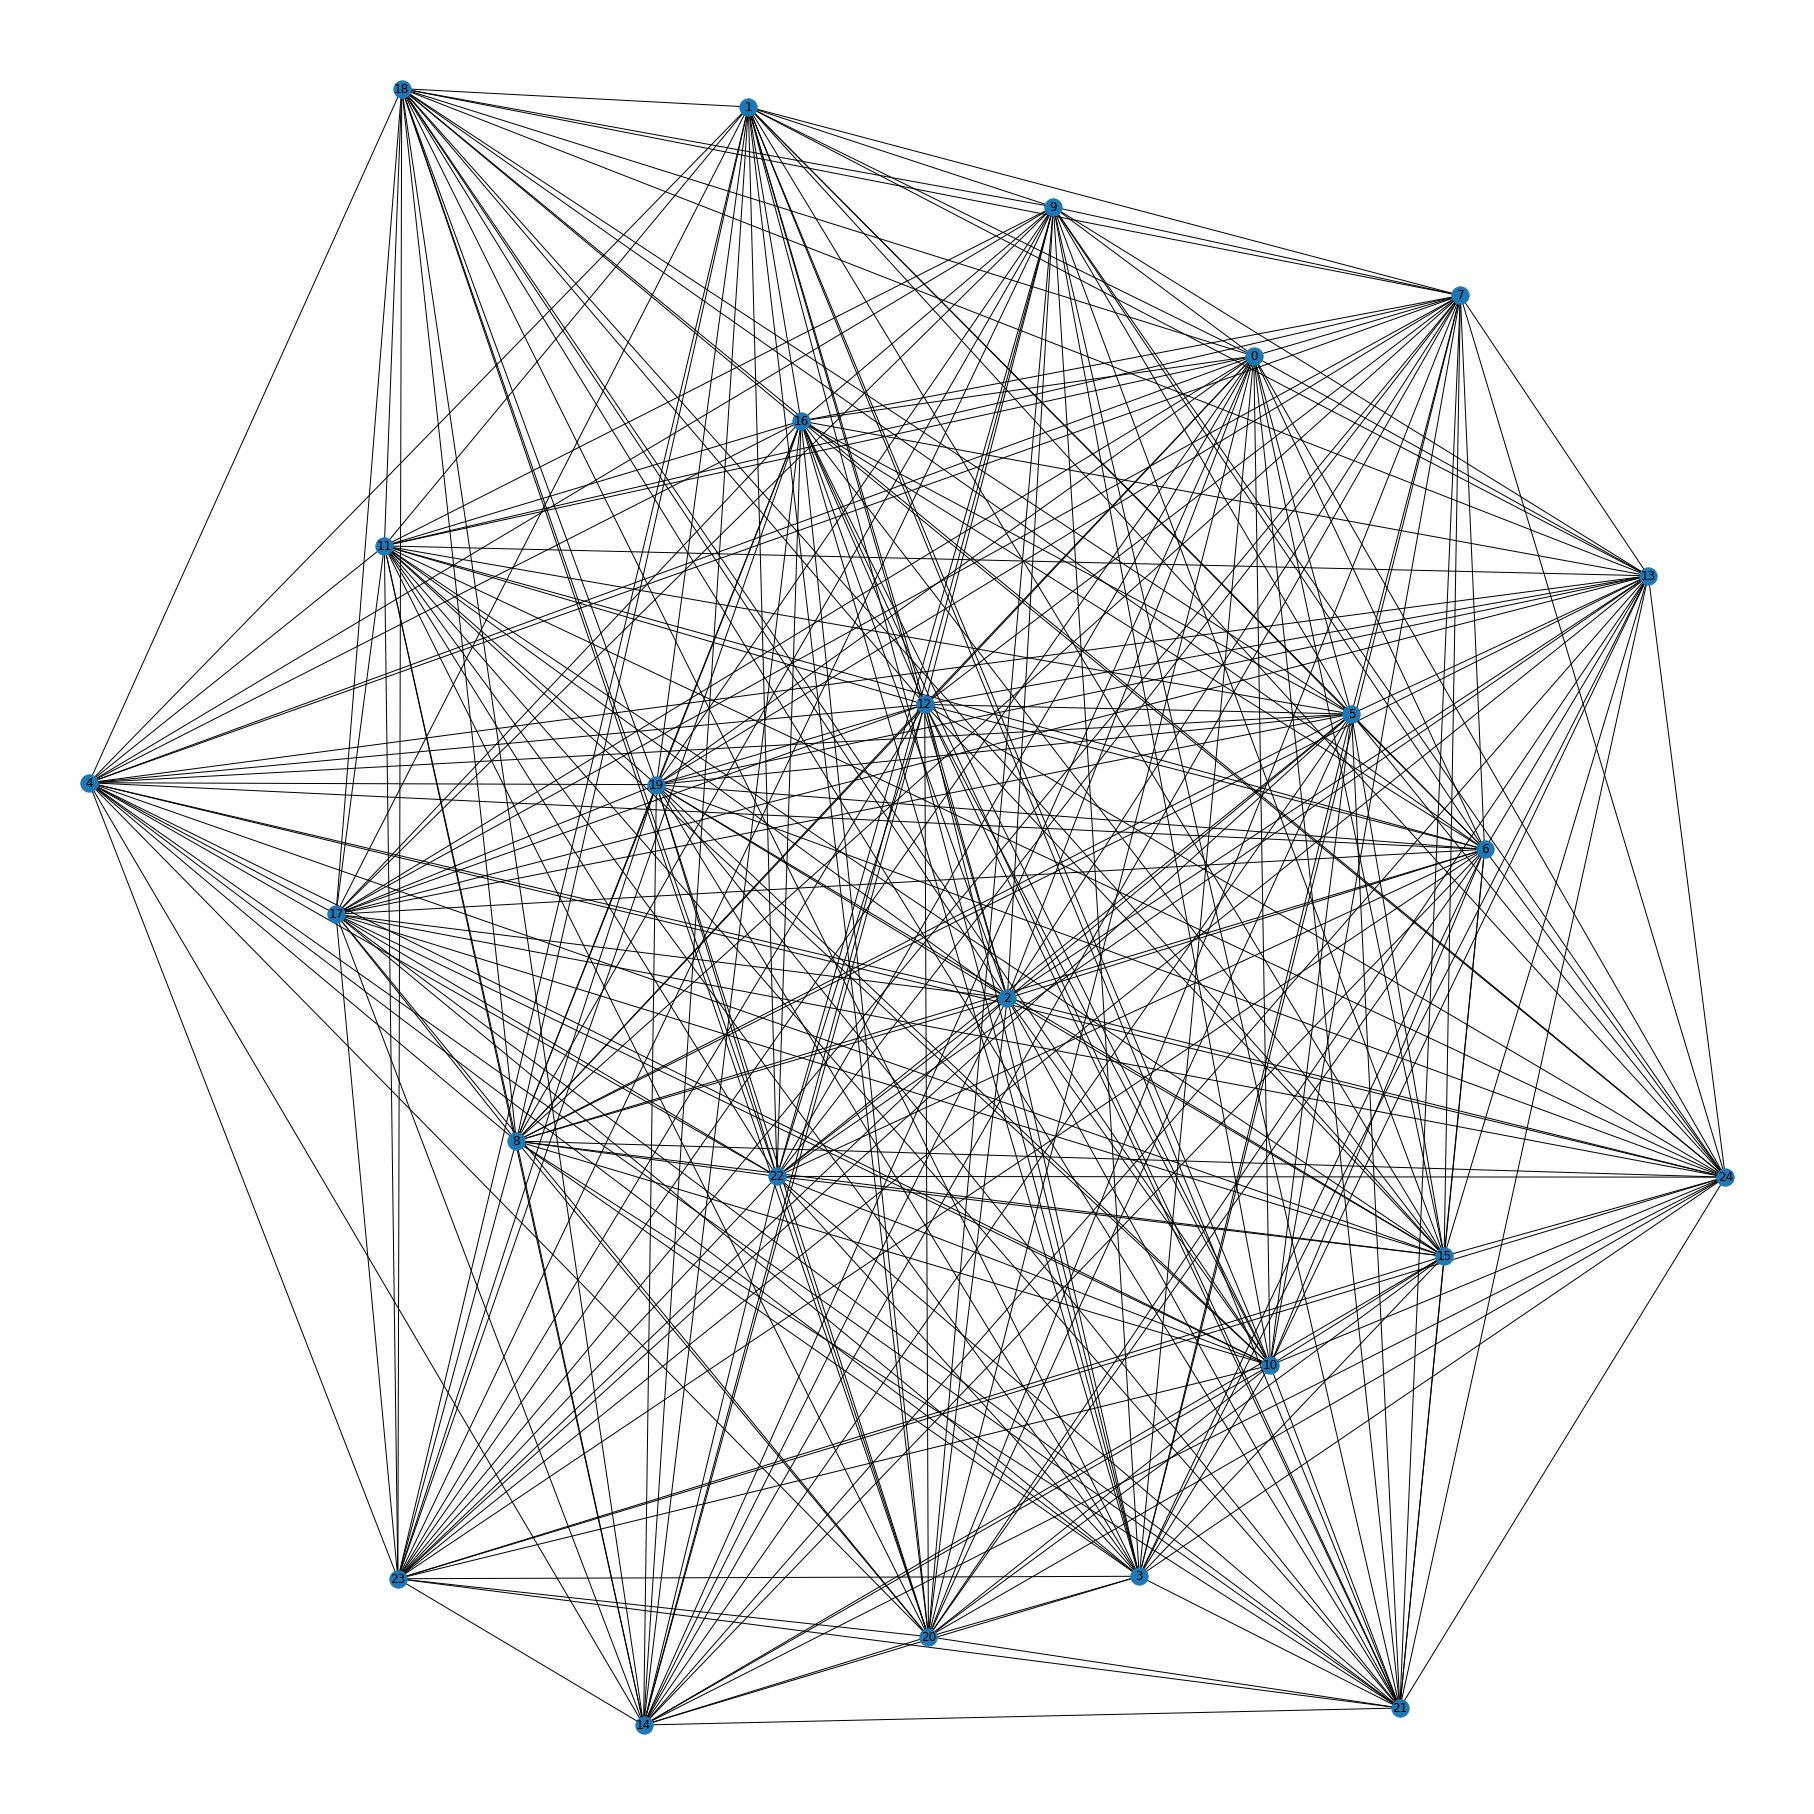

In [3]:
plt.figure(figsize=(25,25)) 
nx.draw(G, with_labels=True)
plt.show()

In [4]:
# a little utility function that
# find the cost of a tour
def cost_of_tour(G, tour):
    cost = 0
    for u,v in zip(tour, tour[1:]):
        cost += G[u][v]['weight']
    cost += G[len(tour) - 1][0]['weight']
    return cost

In [5]:
source(exp_schedule)
schedule = exp_schedule(k=2000,lam=0.005, limit=100000)

In [6]:
num_of_iterations = 2000

In [7]:
states = []

current = [*G.nodes()]
shuffle(current)

for t in range(num_of_iterations):
    T = schedule(t)
    
    # generate 5 more paths to choose from
    neighbours = list()
    for _ in range(5):
        child = current[:]
        i = randint(0, len(child) - 1)
        j = randint(0, len(child) - 1)
        child[i], child[j] = child[j], child[i]
        neighbours.append(child)
    
    next_choice = random.choice(neighbours)
    
    delta_e = cost_of_tour(G, next_choice) - cost_of_tour(G, current)  # difference of cost
    if delta_e < 0 or probability(np.exp(-1 * delta_e)/ (T)): # getting closer to the goal
        current = next_choice
    states.append(cost_of_tour(G, current))

In [8]:
current

[5,
 17,
 24,
 4,
 7,
 16,
 19,
 13,
 11,
 8,
 20,
 18,
 3,
 6,
 22,
 21,
 12,
 2,
 15,
 0,
 14,
 1,
 23,
 9,
 10]

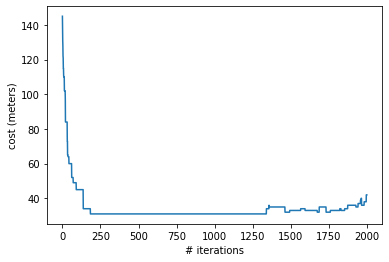

In [9]:
import matplotlib.pyplot as plt
plt.xlabel("# iterations")
plt.ylabel("cost (meters)")
plt.plot(states)
plt.show()